#### 1. K-fold교차 검증

In [1]:
from sklearn import datasets
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#숫자 데이터셋 로드
digits = datasets.load_digits()
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

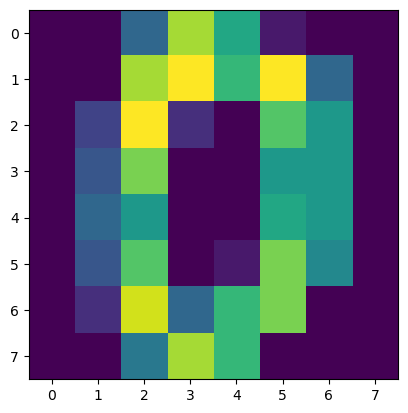

In [3]:
plt.imshow(digits.data[0].reshape(8,8))
plt.show()

In [4]:
#특성행렬
features = digits.data
target = digits.target

In [5]:
#표준화 객체
standardizer = StandardScaler()

In [6]:
#로지스틱 회귀 객체
logit = LogisticRegression()

In [7]:
#표준화한 다음 로지스틱 회귀를 실행하는 파이프라인
pipeline = make_pipeline(standardizer, logit)

In [8]:
#k-fold 교차검증
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [9]:
#k-fold 교차검증 수행
cv_results = cross_val_score(pipeline, features, target, cv=kf, scoring='accuracy', n_jobs=-1)

In [10]:
#결과 평균
cv_results.mean()

0.9693916821849783

#### 2. ShuffleSplit
- 반복횟수에 관계없이 학습용, 검증용 데이터셋을 임의로 지정할 수 있음
- 반복마다 랜덤하게 분할하므로 하나의 샘플이 여러번 포함될 수 있음

In [11]:
#ShuffleSplit 분할기(학습용 50%, 검증용 20%)
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)

In [12]:
#교차검증 수행
cv_results = cross_val_score(pipeline, features, target, cv=ss, scoring='accuracy', n_jobs=-1)

In [13]:
#결과 평균
cv_results.mean()

0.9630555555555554

#### 3. RepeatedKFold 교차검증

In [14]:
#RepeatedKFold 분할기(10회 교차검증을 5회 반복)
from sklearn.model_selection import RepeatedKFold
rk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

In [15]:
cv_results = cross_val_score(pipeline, features, target, cv=rk, scoring='accuracy', n_jobs=-1)

In [16]:
#검증 점수 개수
len((cv_results))

50

In [17]:
#결과 평균
cv_results.mean()

0.9695065176908755

#### 4. 하이퍼파라미터 값의 영향을 시각화

In [18]:
#데이터 로드
digits = datasets.load_digits()

In [19]:
#특성행렬
features = digits.data
target = digits.target

In [20]:
#파라미터 값의 범위
import numpy as np
param_range = np.arange(1, 250, 2)

In [21]:
#학습용, 검증용 데이터셋의 정확도 계산
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    RandomForestClassifier(),
    features,
    target,
    param_name='n_estimators',
    param_range=param_range,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

In [22]:
#학습용 데이터셋 점수의 평균과 표준편차
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [23]:
#검증용 데이터셋 점수의 평균과 표준편차
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

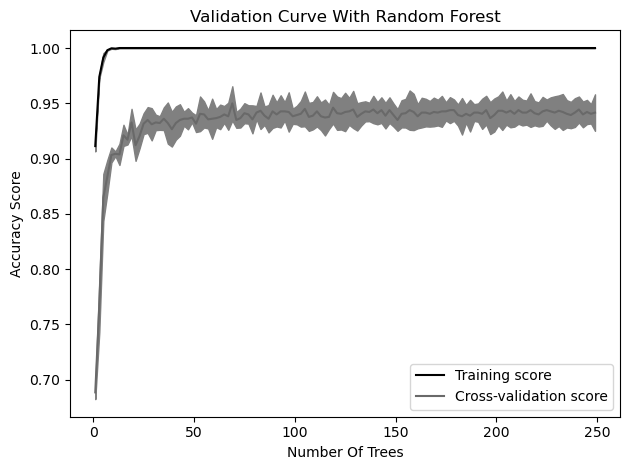

In [24]:
#시각화
# 학습용 데이터셋과 검증용 데이터셋의 평균 정확도 점수
plt.plot(param_range, train_mean, label='Training score', color='black')
plt.plot(param_range, test_mean, label='Cross-validation score', color='dimgrey')
# 학습용 데이터셋과 검증용 데이터셋의 정확도에 대한 표준 편차 그래프
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, color='gray')
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color='gray')
plt.title('Validation Curve With Random Forest')
plt.xlabel('Number Of Trees')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.legend(loc='best')
plt.show()